In [1]:
import os
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm
from PIL import Image

C:\Users\user\AppData\Local\Temp\ipykernel_7112\4229558788.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
excel_file="data.xlsx"

In [3]:
data = pd.read_excel(excel_file, sheet_name=None, skiprows=1)
peach_data = data["Lemon"]

In [4]:
peach_data.columns

Index(['Date', 'Sample name', 'File name', 'Initial (gram)', 'Waste (gram)',
       '% Waste', 'Unnamed: 6', 'Date.1', 'Sample name.1', 'File name.1',
       'Initial (gram).1', 'Waste (gram).1', '% Waste.1'],
      dtype='object')

In [5]:
peach_data_top = peach_data[["File name", "% Waste"]]
peach_data_top.dropna(inplace=True)

peach_data_side = peach_data[["File name.1", "% Waste.1"]]

peach_data_side.rename(columns={"File name.1": "File name", "% Waste.1": "% Waste"},inplace=True)
peach_data_side.dropna(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7112\4094097339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peach_data_top.dropna(inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7112\4094097339.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  peach_data_side.rename(columns={"File name.1": "File name", "% Waste.1": "% Waste"},inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_7112\4094097339.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [6]:
peach_data_top

,File name,% Waste
0,20240104_lemon_01_top_01,30.931677
1,20240104_lemon_02_top_01,31.090487
2,20240104_lemon_03_top_01,36.273818
3,20240104_lemon_04_top_01,100.000000
4,20240104_lemon_05_top_01,7.618284
...,...,...
56,20240327_lemon_03_top_01,42.806013
57,20240401_lemon_01_top_01,63.813230
58,20240401_lemon_02_top_01,61.107802
59,20240401_lemon_03_top_01,83.154362


In [7]:
peach_data_side

,File name,% Waste
0,20240104_lemon_01_side_01,30.931677
1,20240104_lemon_02_side_01,31.090487
2,20240104_lemon_03_side_01,36.273818
3,20240104_lemon_04_side_01,100.000000
4,20240104_lemon_05_side_01,7.618284
5,20240104_lemon_06_side_01,17.797138
6,20240104_lemon_07_side_01,3.662692
7,20240104_lemon_08_side_01,4.500549
8,20240104_lemon_09_side_01,2.262931
9,20240104_lemon_10_side_01,27.886563


In [8]:
data = pd.concat([peach_data_side,peach_data_top], axis=0)

In [9]:
data

,File name,% Waste
0,20240104_lemon_01_side_01,30.931677
1,20240104_lemon_02_side_01,31.090487
2,20240104_lemon_03_side_01,36.273818
3,20240104_lemon_04_side_01,100.000000
4,20240104_lemon_05_side_01,7.618284
...,...,...
56,20240327_lemon_03_top_01,42.806013
57,20240401_lemon_01_top_01,63.813230
58,20240401_lemon_02_top_01,61.107802
59,20240401_lemon_03_top_01,83.154362


<Axes: >

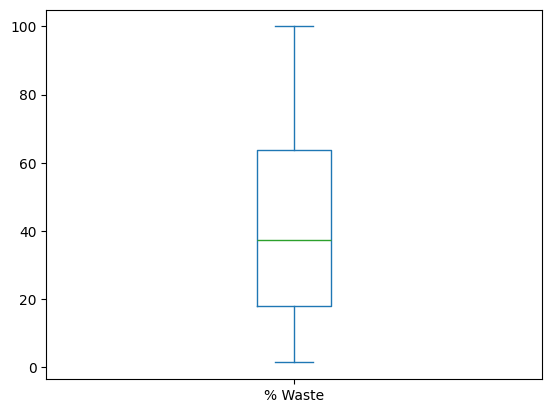

In [10]:
data.plot.box()

In [11]:
actual_waste = data["% Waste"]
baseline_prediction = np.mean(data["% Waste"]) 

# Generate baseline predictions for all samples
baseline_predictions = np.full_like(actual_waste, baseline_prediction)

# Calculate RMSE for baseline predictions
baseline_rmse = np.sqrt(mean_squared_error(actual_waste, baseline_predictions))



print("Baseline RMSE:", baseline_rmse)

Baseline RMSE: 30.2508599975209


Extraction Color Histograms and Training Models

In [12]:
# Function to extract histogram features from image files
def extract_histogram(image_path):
    try:
        image = cv2.imread(image_path)
        if image is None:
            raise Exception(f"Failed to open image '{image_path}'")
        hist = cv2.calcHist(
            [image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256]
        )
        hist = cv2.normalize(hist, hist).flatten()
        return hist
    except Exception as e:
        print(f"Error processing image '{image_path}': {e}")
        return None


# Extracting histogram features from filenames
peach_folder = "lemon"
data["Histogram"] = data["File name"].apply(
    lambda x: extract_histogram(os.path.join(peach_folder, x + ".jpg"))
)

# Remove rows where the histogram extraction failed
data = data.dropna()

# Preparing features and target
X = np.vstack(data["Histogram"]).astype(float)
y = data["% Waste"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Training regression models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(f"{name}: RMSE = {rmse}")

Error processing image 'lemon\20240122_lemon_01_top_01.jpg': Failed to open image 'lemon\20240122_lemon_01_top_01.jpg'
Error processing image 'lemon\20240326_lemon_01_top_01.jpg': Failed to open image 'lemon\20240326_lemon_01_top_01.jpg'
Error processing image 'lemon\20240327_lemon_01_top_01.jpg': Failed to open image 'lemon\20240327_lemon_01_top_01.jpg'
Error processing image 'lemon\20240327_lemon_02_top_01.jpg': Failed to open image 'lemon\20240327_lemon_02_top_01.jpg'
Error processing image 'lemon\20240327_lemon_03_top_01.jpg': Failed to open image 'lemon\20240327_lemon_03_top_01.jpg'
Random Forest: RMSE = 20.234410121925688
XGBoost: RMSE = 22.27491784866451
SVR: RMSE = 19.24902282734559


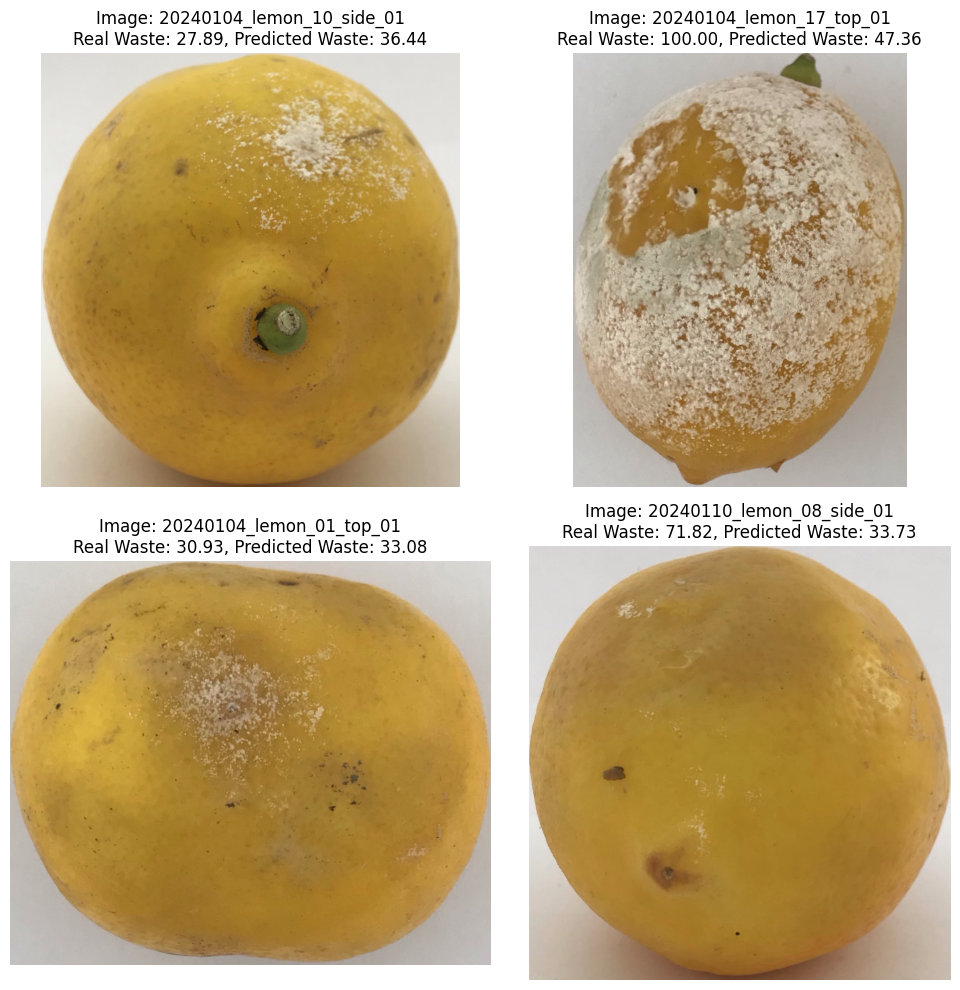

In [13]:

test_filenames = random.sample(
    data["File name"].tolist(), 4
)  # Select 4 images for a 2x2 grid
test_image_paths = [
    os.path.join(peach_folder, f"{filename}.jpg") for filename in test_filenames
]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Display real and predicted waste percentages for test images
for ax, image_path, filename in zip(axes.flatten(), test_image_paths, test_filenames):
    real_waste_percentage = data[data["File name"] == filename]["% Waste"].values[0]
    hist = extract_histogram(image_path)
    if hist is not None:
        hist = hist.reshape(1, -1)
        predicted_waste = model.predict(hist)[0]

        # Load and display the image using Matplotlib
        img = mpimg.imread(image_path)
        ax.imshow(img)
        ax.set_title(
            f"Image: {filename}\nReal Waste: {real_waste_percentage:.2f}, Predicted Waste: {predicted_waste:.2f}"
        )
        ax.axis("off")  # Hide axes
    else:
        print(f"Image: {image_path}, Histogram extraction failed")

# Adjust layout
plt.tight_layout()
plt.show()

## DL Based Regression

In [14]:
train_df, test_df = train_test_split(data.dropna(), test_size=0.2, random_state=42)

train_df = train_df[
    train_df["File name"].apply(
        lambda x: os.path.exists(os.path.join("lemon", x + ".jpg"))
    )
]
test_df = test_df[
    test_df["File name"].apply(
        lambda x: os.path.exists(os.path.join("lemon", x + ".jpg"))
    )
]


val_df, test_df = train_test_split(test_df,test_size=0.5, random_state=42)

len(train_df),len(test_df), len(val_df)

(70, 9, 9)

In [15]:
train_df

,File name,% Waste,Histogram
23,20240110_lemon_06_top_01,37.281444,"[0.0, 2.9973287e-06, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
41,20240117_lemon_10_top_01,74.376200,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
11,20240104_lemon_12_side_01,3.586957,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
30,20240110_lemon_13_side_01,32.858215,"[0.0, 7.2030284e-06, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,20240104_lemon_09_top_01,2.262931,"[0.0, 1.0702548e-05, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...
20,20240110_lemon_03_side_01,100.000000,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28,20240110_lemon_11_top_01,32.337434,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
39,20240117_lemon_08_top_01,53.429027,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
14,20240104_lemon_15_side_01,3.104027,"[0.0, 2.3250488e-05, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [16]:
from torchvision import transforms


class CustomDataset(Dataset):
    def __init__(self, dataframe, root_dir, transform=None):
        self.dataframe = dataframe
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.dataframe.iloc[idx, 0] + ".jpg")
        if not os.path.exists(img_name):
            return None, None
        image = cv2.imread(img_name)
        label = self.dataframe.iloc[idx, 1]

        # Convert BGR image to RGB
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # Convert numpy array to PIL image
        image = Image.fromarray(image)

        if self.transform:
            image = self.transform(image)

        return image, label


# Define image transformations
train_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

test_transforms = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)


# Define datasets and data loaders
train_dataset = CustomDataset(train_df, "lemon", transform=train_transforms)
test_dataset = CustomDataset(test_df, "lemon", transform=test_transforms)
val_dataset = CustomDataset(val_df, "lemon", transform=test_transforms)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)


class RegressionModel(nn.Module):

    def __init__(self):

        super(RegressionModel, self).__init__()
        resnet = torchvision.models.resnet101(pretrained=True)
        self.features = nn.Sequential(
            *list(resnet.children())[:-1]
        )  # Remove the last fully connected layer
        self.regressor1 = nn.Linear(
            2048, 256
        )  # Replace the last layer with a regression layer
        self.regressor2 = nn.Linear(256, 1)

    def forward(self, x):

        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.regressor1(x)
        x = self.regressor2(x)
        return x


# Define the model
model = RegressionModel()

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=2e-4)

# Learning rate scheduler
scheduler = ReduceLROnPlateau(
    optimizer, mode="min", factor=0.2, patience=3, verbose=True
)

# Early stopping
best_val_loss = float("inf")
patience = 10
counter = 0
best_model_weights = None

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in tqdm(
        train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False
    ):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels.float())
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}")

    # Validation loop
    model.eval()
    val_running_loss = 0.0

    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        val_loss = criterion(outputs.squeeze(), labels.float())
        val_running_loss += val_loss.item() * inputs.size(0)

    val_epoch_loss = val_running_loss / len(val_loader.dataset)
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_epoch_loss:.4f}")

    # Learning rate scheduler step
    scheduler.step(val_epoch_loss)

    # Early stopping
    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss
        counter = 0
        # Save the best model weights
        best_model_weights = model.state_dict()

    else:
        counter += 1
        if counter >= patience:
            print("Early stopping...")
            break

# Load the best model weights
if best_model_weights is not None:
    model.load_state_dict(best_model_weights)

torch.save(model.state_dict(), "lemon_regression_model.pth")
# Evaluation
model.eval()
predictions = []
true_labels = []
with torch.no_grad():

    for inputs, labels in tqdm(test_loader, desc="Testing", leave=False):

        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)

        predictions.extend(outputs.squeeze().tolist())

        true_labels.extend(labels.tolist())

mse = mean_squared_error(true_labels, predictions)
print(f"Root Mean Squared Error on Test Set: {np.sqrt(mse):.4f}")

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "


Epoch [1/100], Training Loss: 2552.9903
Epoch [1/100], Validation Loss: 1678.9559


Epoch [2/100], Training Loss: 1548.5311
Epoch [2/100], Validation Loss: 1675.2496


Epoch [3/100], Training Loss: 744.6691
Epoch [3/100], Validation Loss: 1012.6086


Epoch [4/100], Training Loss: 456.7786
Epoch [4/100], Validation Loss: 477.5876


Epoch [5/100], Training Loss: 370.4938
Epoch [5/100], Validation Loss: 276.5563


Epoch [6/100], Training Loss: 303.7374
Epoch [6/100], Validation Loss: 500.7473


Epoch [7/100], Training Loss: 162.9129
Epoch [7/100], Validation Loss: 409.2547


Epoch [8/100], Training Loss: 173.1627
Epoch [8/100], Validation Loss: 285.7914


Epoch [9/100], Training Loss: 143.2653
Epoch [9/100], Validation Loss: 223.5864


Epoch [10/100], Training Loss: 147.5911
Epoch [10/100], Validation Loss: 576.9178


Epoch [11/100], Training Loss: 109.6391
Epoch [11/100], Validation Loss: 358.3390


Epoch [12/100], Training Loss: 93.7460
Epoch [12/100], Validation Loss: 206.1210


Epoch [13/100], Training Loss: 105.9043
Epoch [13/100], Validation Loss: 253.2724


Epoch [14/100], Training Loss: 70.5239
Epoch [14/100], Validation Loss: 209.1762


Epoch [15/100], Training Loss: 101.0477
Epoch [15/100], Validation Loss: 192.9489


Epoch [16/100], Training Loss: 81.9788
Epoch [16/100], Validation Loss: 245.4122


Epoch [17/100], Training Loss: 88.9730
Epoch [17/100], Validation Loss: 135.9932


Epoch [18/100], Training Loss: 84.7203
Epoch [18/100], Validation Loss: 138.1300


Epoch [19/100], Training Loss: 63.5726
Epoch [19/100], Validation Loss: 312.2319


Epoch [20/100], Training Loss: 75.9527
Epoch [20/100], Validation Loss: 362.6964


Epoch [21/100], Training Loss: 145.9075
Epoch [21/100], Validation Loss: 241.9905


Epoch [22/100], Training Loss: 112.4306
Epoch [22/100], Validation Loss: 241.5131


Epoch [23/100], Training Loss: 58.7717
Epoch [23/100], Validation Loss: 255.0240


Epoch [24/100], Training Loss: 52.5505
Epoch [24/100], Validation Loss: 271.1183


Epoch [25/100], Training Loss: 64.9661
Epoch [25/100], Validation Loss: 267.3745


Epoch [26/100], Training Loss: 15.3132
Epoch [26/100], Validation Loss: 278.4042


Epoch [27/100], Training Loss: 28.3691
Epoch [27/100], Validation Loss: 273.7707
Early stopping...


Root Mean Squared Error on Test Set: 17.8878


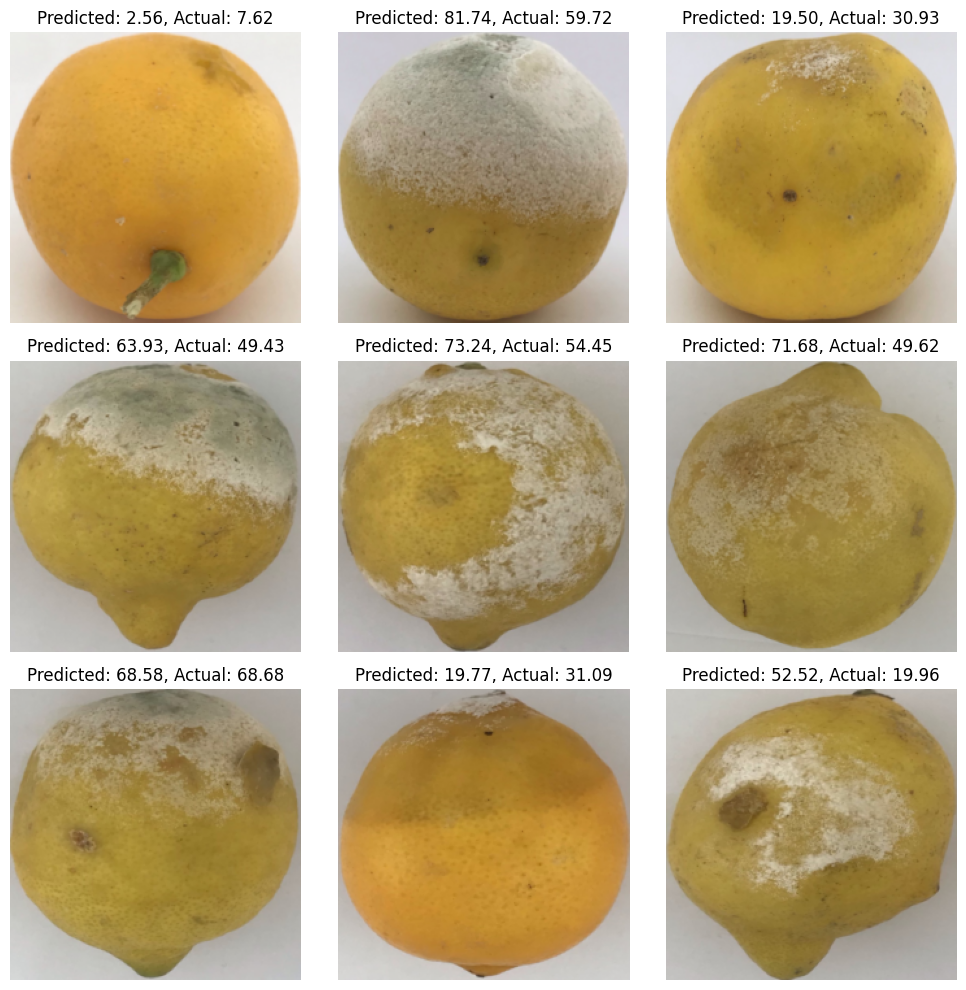

In [17]:
# Evaluation
model.eval()
with torch.no_grad():
    # Get random indices for 4 test images
    indices = np.random.choice(len(test_dataset), size=9, replace=False)

    # Create a subplot
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))

    for i, idx in enumerate(indices):
        inputs, label = test_dataset[idx]
        inputs = inputs.unsqueeze(0).to(device)
        output = model(inputs)
        prediction = output.item()

        # Denormalize the image
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = inputs.squeeze().permute(1, 2, 0).cpu().numpy()
        img = std * img + mean  # Denormalize
        img = np.clip(img, 0, 1)  # Clip values to [0, 1]

        # Display the image
        axs[i // 3, i % 3].imshow(img)
        axs[i // 3, i % 3].set_title(
            f"Predicted: {prediction:.2f}, Actual: {label:.2f}"
        )
        axs[i // 3, i % 3].axis("off")

    plt.tight_layout()
    plt.show()